In [16]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization
from keras.layers import RandomFlip, RandomRotation, RandomZoom, Input
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
#generators (used to process large amount of data what it deos is it divides dataset into batches of
            #input)

train_ds=keras.utils.image_dataset_from_directory(
    directory='/kaggle/input/dogsvscats/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory='/kaggle/input/dogsvscats/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [18]:
#Normalize (numpy ma value are from 0 to 255 so we have to make 0-1)
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [34]:
# callback

callback = [EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.001,
    patience= 6,
    restore_best_weights=True


)]

In [35]:
#Define Augmentation
data_aug = tf.keras.Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.1),
])


# Create CNN model

model=Sequential()

model.add(Input(shape=(256,256,3)))
model.add(data_aug)


model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(256,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))


#making conv conv pool makes it such that no critical data are lost during pooling

In [36]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 252, 252, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 252, 252, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 124, 124, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 124, 124, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 122, 122, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 122, 122, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 59, 59, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 59, 59, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 57, 57, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 57, 57, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 26, 26, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 26, 26, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 24, 24, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 12, 12, 256)    │             

 Total params: 10,646,561 (40.61 MB)

 Trainable params: 10,644,641 (40.61 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [37]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [38]:
history = model.fit(train_ds,validation_data=validation_ds,epochs=30,callbacks=callback)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 133s 203ms/step - accuracy: 0.5376 - loss: 1.8932 - val_accuracy: 0.6256 - val_loss: 0.6408
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 126s 202ms/step - accuracy: 0.6299 - loss: 0.6543 - val_accuracy: 0.6526 - val_loss: 0.6059
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 127s 202ms/step - accuracy: 0.6877 - loss: 0.5986 - val_accuracy: 0.5916 - val_loss: 1.1561
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 127s 202ms/step - accuracy: 0.6929 - loss: 0.5955 - val_accuracy: 0.6938 - val_loss: 0.5998
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 127s 202ms/step - accuracy: 0.7437 - loss: 0.5288 - val_accuracy: 0.7074 - val_loss: 0.5830
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 127s 202ms/step - accuracy: 0.7753 - loss: 0.4807 - val_accuracy: 0.7906 - val_loss: 0.4613
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 127s 203ms/step - accuracy: 0.8115 - loss: 0.4271 - val_accuracy: 0.8316 - val_loss: 0.3930
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 127s 203ms/step - accuracy: 0.8444 -

In [39]:
import matplotlib.pyplot as plt

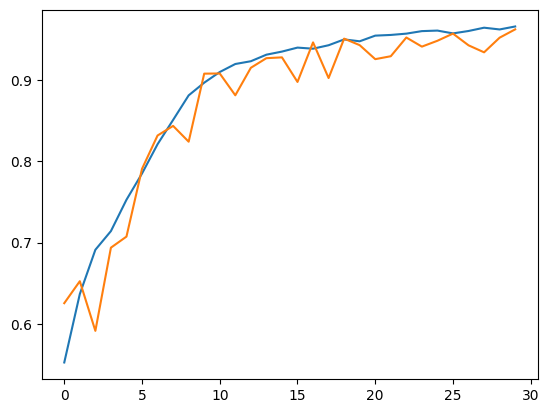

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

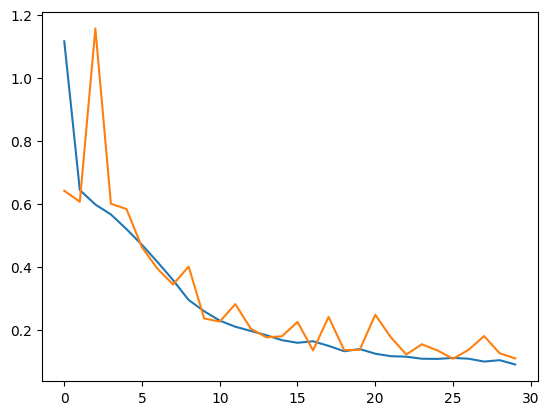

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [42]:
import os
import numpy as np
import tensorflow as tf

image_dir = "/kaggle/input/unseen/unseen"

images = []
image_names = []

for filename in os.listdir(image_dir):
    if filename.lower().endswith((".jpg", ".png", ".jpeg",'webp')):
        img_path = os.path.join(image_dir, filename)
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=(256,256))
        img = tf.keras.preprocessing.image.img_to_array(img)
        img = img / 255.0
        images.append(img)
        image_names.append(filename)

images = np.array(images)



In [45]:
predictions = model.predict(images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


In [46]:
labels = ["Cat", "Dog"]

for i, pred in enumerate(predictions):
    predicted_class = 1 if pred > 0.5 else 0
    print(image_names[i], "→", labels[predicted_class])

cat3.webp → Cat
cat7.webp → Cat
cat6.webp → Cat
cat8.webp → Cat
cat.webp → Cat
dog5.webp → Dog
dog2.webp → Dog
cat5.webp → Cat
dog4.webp → Dog
dog6.webp → Dog
dog3.webp → Dog
dog8.webp → Dog
dog.webp → Dog
cat2.webp → Cat
cat4.webp → Cat
dog7.webp → Dog


In [48]:
model.save("/kaggle/working/dogs_vs_cats_model.keras")
